# Z-toets wijnrecensies

In het afgelopen jaar was het bijzonder zonnig in Portugal. De verbouwers van wijn vragen zich af of dit de zuurgraad (pH) van heeft beïnvloed, met andere woorden: of de wijnen uit het afgelopen jaar een andere pH hebben dan. Ze doen daarom een steekproef en meten de zuurgraad in enkele rode wijnen van afgelopen jaar. Daar komen de volgende meetwaarden uit:

| Wijn | pH |
|------|---------------|
|Casa Santa Vitória| 3.41 | 
|Monte da Penha| 3.51 | 
|Real Companhia Velha| 3.39 | 
|Aveleda| 3.11 | 
|Companhia das Quintas| 3.21 | 
|J, Portugal Ramos| 3.50 | 
|Sogrape| 3.46 | 
|Casa Santos Lima| 3.37 | 
|Quinta de Ventozelo| 3.71 |

Bepaal of deze wijnen een significant andere zuurgraad hebben dan gemiddeld. Neem de dataset als populatie en kies als betrouwbaarheid 95%.

# Uitwerking

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('redwine.csv',encoding  = "ansi", delimiter = ';')
df.head(10)

,id,country,description,designation,points,price,province,taster_name,title,variety,...,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Kerin O’Keefe,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,...,0.29,0.4,2.9,0.098,10.0,26.0,10.006,3.48,0.91,9.7
1,2,Portugal,"From an estate in the south of the Alentejo, t...",Grande Reserva Tinto,91,26.0,Alentejano,Roger Voss,Casa Santa Vitória 2013 Grande Reserva Tinto R...,Portuguese Red,...,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
2,3,Portugal,A year in wood and 30 months in bottle before ...,Montes Claros Garrafeira,90,28.0,Alentejo,Paul Gregutt,Adega Cooperativa de Borba 2012 Montes Claros ...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
3,4,Portugal,Wood aging gives this ripe blend of Baga and T...,NaN,90,20.0,Beira Atlantico,Alexander Peartree,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
4,5,Portugal,"A powerful wine, richly structured and full of...",Gerações Colheita Seleccionada,92,34.0,Alentejano,Paul Gregutt,Herdade Grande 2010 Gerações Colheita Seleccio...,Portuguese Red,...,0.48,0.34,2.2,0.073,16.0,25.0,0.9936,3.28,0.66,12.4
5,6,Portugal,This is a new wine from the hands of master wi...,Monte de Carrapatelo Colheita Seleccionada Tinto,92,30.0,Alentejano,Michael Schachner,Luis Duarte 2013 Monte de Carrapatelo Colheita...,Portuguese Red,...,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3
6,7,Portugal,As its name suggests this is a selection of ba...,Lagoalva Barrel Selection Tinto,92,23.0,Tejo,Kerin O’Keefe,Quinta da Lagoalva de Cima 2013 Lagoalva Barre...,Portuguese Red,...,0.47,0.43,2.1,0.171,27.0,66.0,0.9982,3.17,0.76,10.8
7,8,Portugal,"This is an impressive, powerful wine, It speak...",NaN,92,80.0,Douro,Roger Voss,Quinta do Monte Xisto 2013 Red (Douro),Portuguese Red,...,0.53,-,1.4,0.070,6.0,14.0,0.99593,3.25,0.64,10
8,9,Portugal,"Powerful and concentrated, this is just at its...",Grande Reserva,92,32.0,Alentejo,Anna Lee C. Iijima,Monte da Penha 2005 Grande Reserva Red (Alentejo),Portuguese Red,...,0.33,0.41,1.5,0.056,6.0,35.0,0.99396,3.29,0.71,11
9,10,Portugal,"This mature wine has a soft, smooth character ...",VT '08,90,32.0,Douro,Roger Voss,Quinta do Sagrado 2008 VT '08 Red (Douro),Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3


In [4]:
df.shape


(2465, 22)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 22 columns):
id                      2465 non-null int64
country                 2465 non-null object
description             2465 non-null object
designation             2312 non-null object
points                  2465 non-null int64
price                   2196 non-null float64
province                2465 non-null object
taster_name             2465 non-null object
title                   2465 non-null object
variety                 2465 non-null object
winery                  2465 non-null object
fixed acidity           2465 non-null float64
volatile acidity        2465 non-null float64
citric acid             2465 non-null object
residual sugar          2465 non-null float64
chlorides               2465 non-null float64
free sulfur dioxide     2465 non-null float64
total sulfur dioxide    2465 non-null float64
density                 2465 non-null object
pH                      2465 non-

In [6]:
df.columns

Index(['id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'taster_name', 'title', 'variety', 'winery',
       'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [13]:
df['pH'].mean()

3.311200811359032

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

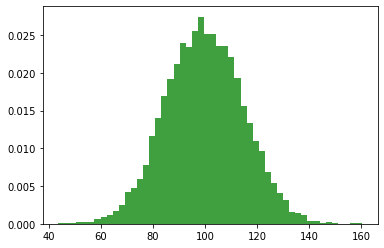

In [20]:
# the histogram of the data

# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel(df['title'])
plt.ylabel(df['pH'])
plt.title('Histogram of the wine pH')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(40, 160)
plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

In [9]:
# De score en ingredienten tegeonver provincie?